In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as pth
import seaborn as sns
from astropy.stats import RipleysKEstimator
from shapely.geometry import Polygon
import re
from itertools import compress
from itertools import chain
from collections import defaultdict
import os
pd.options.display.max_colwidth=300

In [3]:
# RoiAttr files
roiattr_files= !ls /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/*COORD.txt
files=pd.DataFrame(data=roiattr_files, columns=['RoiAttr'])
files['index']=files['RoiAttr'].map(lambda x: x[82:90]+ str('_') + x[121:123]  + '_'
                                    + re.search(r'\w*_(\d+)_RoiAttr_COORD.txt', x).group(1))
files.set_index('index', inplace=True)
files.head(3)

RoiAttr
index                                                                                                                                                                                                         
BB185_02_01_4    /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01_activeContourROI_4_RoiAttr_COORD.txt
BB185_02_02_13  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02_activeContourROI_13_RoiAttr_COORD.txt
BB185_02_02_16  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02_activeContourROI_16_RoiAttr_COORD.txt

In [4]:
#RoiCoord files
roicoord_files=! ls /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/*.txt
files_coord=pd.DataFrame(data=roicoord_files, columns=['RoiCoord'])
files_coord['index']=files_coord['RoiCoord'].map(lambda x: x[83:91]+ str('_') + x[122:124] + '_' +
                                                re.search(r'\w*_(\d+)_RoiCoord.txt', x).group(1))
files_coord.set_index('index', inplace=True)

In [5]:
#defining groups
def group_id(Cell):
    if Cell=='BB185':
        return 'High'
    if Cell=='BB193':
        return 'High'
    if Cell=='BB192':
        return 'Ctrl'
    if Cell=='BB203':
        return 'Ctrl'
    if Cell == 'BB222':
        return 'Low'
    if Cell == 'BB226':
        return 'Low'
    if Cell == 'BB238':
        return 'Low'
    if Cell == 'BB239':
        return 'Low'

In [74]:
# Unified, indexed table with RoiCoord and RoiAttr pathes with Cell and Group names included
files['RoiCoord']=files.index.map(files_coord['RoiCoord'])
files['Cell']=files.index.map(lambda x: x[:5])
files['Group']=files['Cell'].apply(lambda cell: group_id(cell))
files=files.dropna()
hi=files[files['Group']=='High']
lo=files[files['Group']=='Low']
ct=files[files['Group']=='Ctrl']
hi[30:60]

RoiAttr  \
index                                                                                                                                                                                                              
BB185_06_02_119  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_06_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S20_activeContourROI_119_RoiAttr_COORD.txt   
BB185_06_03_122  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_06_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S21_activeContourROI_122_RoiAttr_COORD.txt   
BB185_06_03_129  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_06_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S21_activeContourROI_129_RoiAttr_COORD.txt   
BB185_07_01_132  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_07_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S22_activeContourROI_132_RoiAttr_COORD.txt   
BB185_07_01_135  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_07_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S22_activeContourROI_135_RoiAttr_COORD.txt   
BB185_07_01_138  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_07_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S22_activeContourROI_138_RoiAttr_COORD.txt   
BB185_07_02_141  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_07_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S23_activeContourROI_141_RoiAttr_COORD.txt   
BB185_07_02_146  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_07_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S23_activeContourROI_146_RoiAttr_COORD.txt   
BB185_07_03_149  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_07_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S24_activeContourROI_149_RoiAttr_COORD.txt   
BB185_07_03_152  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_07_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S24_activeContourROI_152_RoiAttr_COORD.txt   
BB185_07_03_155  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB185_07_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S24_activeContourROI_155_RoiAttr_COORD.txt   
BB193_01_01_222  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB193_01_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S33_activeContourROI_222_RoiAttr_COORD.txt   
BB193_01_01_225  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB193_01_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S33_activeContourROI_225_RoiAttr_COORD.txt   
BB193_01_02_229  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB193_01_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S34_activeContourROI_229_RoiAttr_COORD.txt   
BB193_01_02_232  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB193_01_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S34_activeContourROI_232_RoiAttr_COORD.txt   
BB193_01_03_235  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB193_01_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S35_activeContourROI_235_RoiAttr_COORD.txt   
BB193_01_03_240  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB193_01_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S35_activeContourROI_240_RoiAttr_COORD.txt   
BB193_01_03_243  /mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB193_01_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S35_act

In [11]:
len(hi['RoiAttr'])

75

In [9]:
# defining RoiAttr Polygon
def polygon_area(path):
    '''
Reads a coordinate file and returns a  polygon.
Needs  shapely
'''
    df=pd.read_csv(path, sep='\t', header='infer')
    roizip=zip(df.x, df.y)
    roilist=list(roizip)
    polyarea=Polygon(roilist).area
    return polyarea

In [109]:
def draw_bouton_ripley(path_roicoord, path_roiattr):
    '''
path_roicoord - path to the given bouton's roicoord files. Text file generated 
from vividstorm containing the interesting informations from the given storm 
localizations.
path_roiattr - path to the given bouton's roiattr files. Has to contain the x 
and y coordinates of the ROI only.

    '''
    coord=pd.read_csv(path_roicoord, header='infer', sep='\t')
    n=len(coord.loc[coord['Channel Name']=='405/647']) # number of LPs in the STORM stack
    xx=coord.loc[coord['Channel Name']=='405/647']['Xwc'] # x coordinates of LP
    yy=coord.loc[coord['Channel Name']=='405/647']['Ywc'] # y coordinate of LP
    real=list(zip(xx, yy))  # zipped x+y coords
    # real[:10]
    #reading in RoiAttr file
    attr01=pd.read_csv(path_roiattr, header='infer', sep='\t')
    vtx=list(zip(attr01['x'], attr01['y'])) # coordinates for RoiAttr polygon
    # plt.plot(attr01['x'], attr01['y']) # plots bouton polygon
    # bounding box coordinates of the polygons
    xlow=attr01.x.min()
    xhigh=attr01.x.max()
    ylow=attr01.y.min()
    yhigh=attr01.y.max()
    #generating n random points inside the bounding box
    zx=np.random.uniform(low=xlow, high=xhigh, size=n)
    zy=np.random.uniform(low=ylow, high=yhigh, size=n)
    zxy=list(zip(zx,zy))
    #print(len(zxy))
    contain=pth.Path(vtx).contains_points(zxy)
    filtered=list(compress(zxy, contain))
    ins=len(filtered)
    ins                   # number of points inside the polygon
    # generating n points inside the polygon
    while ins<n:
        zx1=np.random.uniform(low=xlow, high=xhigh, size=(n-ins))
        zy1=np.random.uniform(low=ylow, high=yhigh, size=(n-ins))
        zxy1=list(zip(zx1,zy1))
        zxy=zxy+zxy1
    #     print(zxy)/
        contain=pth.Path(vtx).contains_points(zxy)
        filtered=list(compress(zxy, contain))
        ins=len(filtered)
    print(path_roicoord)
    print(f'Number of real points: {n} \nNumber of generated points: {ins}')
    # prints real and generated LP number inside the polygon
    fx,fy=zip(*filtered)  # unzips generated uniform x and y coordinates
    # len(fy)
    # plots the borders of the investigated bouton, the generated uniform and the
    # real distribution
    
    #plots the investigated bouton and the theoretical uniform distribution
    pr=polygon_area(path_roiattr)
    sns.set(style="white", context="paper")
    f=plt.figure(figsize=(8,6), dpi=300)
    ax=f.add_subplot(111)
    plt.plot(attr01['x'], attr01['y'], 'b--', label='_nolegend_')
    plt.plot(fx,fy, 'go', markersize=5, markeredgecolor="w", markeredgewidth=0.5, label='Uniform')
    plt.plot(xx,yy, 'ro', markersize=5, markeredgecolor="w", markeredgewidth=0.5, label='Real $CB_1$')
    plt.legend(loc=2)
    fpath, fname = os.path.split(path_roicoord)
    code =  re.search(r'(BB\d{3}_\d{2}_).*storm(\d{2}_).*_(\d+)_RoiCoord.txt', fname)
    idf = str(code.group(1) + code.group(2) + code.group(3) + '_bouton.png')
    base = '/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/plots_GABA/'
    filename_bouton = os.path.join(base, idf)
    plt.title(str(code.group(1) + code.group(2) + code.group(3)))
    plt.xlabel(('Xwc'))
    plt.ylabel('Ywc')
    dens = n/pr
    plt.text(0.95,0.95, f'nlp= {n}\nDens: {dens:.<3.2e}', transform=ax.transAxes, fontsize=8, ha='right')
    sns.despine()
    #f.savefig(filename_bouton, bbox_inches='tight')
    #plt.close()
    
    # plot Ripley's function plots
    sns.set(style="whitegrid",  context="paper")
    g=plt.figure(figsize=(8,8), dpi=300)
    r=np.linspace(0,500,100)
    Kest=RipleysKEstimator(area=pr, x_min=xlow, x_max=xhigh, y_min=ylow, y_max=yhigh)
    plt.plot(r, Kest.poisson(r), color='blue', ls='--', label=r'$K_{pois}$')
    plt.plot(r, Kest(data=filtered, radii=r, mode='ripley'), color='green', ls='--', label=r'$K_{uniform}$')
    plt.plot(r, Kest(data=real, radii=r, mode='ripley'), color='red', ls='--', label=r'$K_{GABA\ bouton}$')
    plt.legend()
    idr = str(code.group(1) + code.group(2) + code.group(3) + '_ripley.png')
    filename_ripley = os.path.join(base, idr)
    plt.title(str(code.group(1) + code.group(2) + code.group(3)))
    plt.xlabel('r (nm)')
    plt.ylabel('K(r)')
    #g.savefig(filename_ripley, bbox_inches='tight')
    #plt.close()

In [53]:
def count_bouton_ripley(path_roicoord, path_roiattr):
    '''
path_roicoord - path to the given bouton's roicoord files. Text file generated 
from vividstorm containing the interesting informations from the given storm 
localizations.
path_roiattr - path to the given bouton's roiattr files. Has to contain the x 
and y coordinates of the ROI only.

    '''
    coord=pd.read_csv(path_roicoord, header='infer', sep='\t')
    n=len(coord.loc[coord['Channel Name']=='405/647']) # number of LPs in the STORM stack
    xx=coord.loc[coord['Channel Name']=='405/647']['Xwc'] # x coordinates of LP
    yy=coord.loc[coord['Channel Name']=='405/647']['Ywc'] # y coordinate of LP
    real=list(zip(xx, yy))  # zipped x+y coords
    # real[:10]
    #reading in RoiAttr file
    attr01=pd.read_csv(path_roiattr, header='infer', sep='\t')
    vtx=list(zip(attr01['x'], attr01['y'])) # coordinates for RoiAttr polygon
    # plt.plot(attr01['x'], attr01['y']) # plots bouton polygon
    # bounding box coordinates of the polygons
    xlow=attr01.x.min()
    xhigh=attr01.x.max()
    ylow=attr01.y.min()
    yhigh=attr01.y.max()
    #generating n random points inside the bounding box
    zx=np.random.uniform(low=xlow, high=xhigh, size=n)
    zy=np.random.uniform(low=ylow, high=yhigh, size=n)
    zxy=list(zip(zx,zy))
    #print(len(zxy))
    contain=pth.Path(vtx).contains_points(zxy)
    filtered=list(compress(zxy, contain))
    ins=len(filtered)
    ins                   # number of points inside the polygon
    # generating n points inside the polygon
    while ins<n:
        zx1=np.random.uniform(low=xlow, high=xhigh, size=(n-ins))
        zy1=np.random.uniform(low=ylow, high=yhigh, size=(n-ins))
        zxy1=list(zip(zx1,zy1))
        zxy=zxy+zxy1
    #     print(zxy)/
        contain=pth.Path(vtx).contains_points(zxy)
        filtered=list(compress(zxy, contain))
        ins=len(filtered)
    print(path_roicoord)
    print(f'Number of real points: {n} \nNumber of generated points: {ins}')
    # prints real and generated LP number inside the polygon
    fx,fy=zip(*filtered)  # unzips generated uniform x and y coordinates
    # len(fy)
    
    fpath, fname = os.path.split(path_roicoord)
    code =  re.search(r'(BB\d{3}_\d{2}_).*storm(\d{2}_).*_(\d+)_RoiCoord.txt', fname)
    idf = str(code.group(1) + code.group(2) + code.group(3))
    
    #plots the investigated bouton and the theoretical uniform distribution
    pr=polygon_area(path_roiattr)
    r=np.linspace(0,500,100)
    Kest=RipleysKEstimator(area=pr, x_min=xlow, x_max=xhigh, y_min=ylow, y_max=yhigh)

    poi=Kest.poisson(r)                                  # generates data for poisson pattern for the given bouton
    uni=Kest(data=filtered, radii=r, mode='ripley')      # generates data for a unique random pattern for the given bouton
    rl=Kest(data=real, radii=r, mode='ripley')           # generates data for the real pattern for the given bouton
    print(f'{idf} Done')
    return {'Name': idf, 'Poisson': poi, 'Uniform':uni, 'Real': rl}

In [81]:
count_bouton_ripley(path_roiattr='/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB193_01_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S34_activeContourROI_232_RoiAttr_COORD.txt', 
                    path_roicoord='/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB193_01_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S34CB_232_RoiCoord.txt')

/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB193_01_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S34CB_232_RoiCoord.txt
Number of real points: 619 
Number of generated points: 619


/home/balla-gyula/anaconda3/lib/python3.7/site-packages/astropy/stats/spatial.py:315: RuntimeWarning: divide by zero encountered in true_divide
  w1 = (1 - (np.arccos(np.minimum(ver_dist, dist) / dist) +
/home/balla-gyula/anaconda3/lib/python3.7/site-packages/astropy/stats/spatial.py:315: RuntimeWarning: invalid value encountered in true_divide
  w1 = (1 - (np.arccos(np.minimum(ver_dist, dist) / dist) +
/home/balla-gyula/anaconda3/lib/python3.7/site-packages/astropy/stats/spatial.py:315: RuntimeWarning: invalid value encountered in arccos
  w1 = (1 - (np.arccos(np.minimum(ver_dist, dist) / dist) +
/home/balla-gyula/anaconda3/lib/python3.7/site-packages/astropy/stats/spatial.py:316: RuntimeWarning: divide by zero encountered in true_divide
  np.arccos(np.minimum(hor_dist, dist) / dist)) / np.pi)
/home/balla-gyula/anaconda3/lib/python3.7/site-packages/astropy/stats/spatial.py:316: RuntimeWarning: invalid value encountered in true_divide
  np.arccos(np.minimum(hor_dist, dist) / dist)) / n

BB193_01_02_232 Done


{'Name': 'BB193_01_02_232',
 'Poisson': array([0.00000000e+00, 8.01344927e+01, 3.20537971e+02, 7.21210435e+02,
        1.28215188e+03, 2.00336232e+03, 2.88484174e+03, 3.92659014e+03,
        5.12860754e+03, 6.49089391e+03, 8.01344927e+03, 9.69627362e+03,
        1.15393670e+04, 1.35427293e+04, 1.57063606e+04, 1.80302609e+04,
        2.05144301e+04, 2.31588684e+04, 2.59635756e+04, 2.89285519e+04,
        3.20537971e+04, 3.53393113e+04, 3.87850945e+04, 4.23911467e+04,
        4.61574678e+04, 5.00840580e+04, 5.41709171e+04, 5.84180452e+04,
        6.28254423e+04, 6.73931084e+04, 7.21210435e+04, 7.70092475e+04,
        8.20577206e+04, 8.72664626e+04, 9.26354736e+04, 9.81647536e+04,
        1.03854303e+05, 1.09704121e+05, 1.15714208e+05, 1.21884563e+05,
        1.28215188e+05, 1.34706082e+05, 1.41357245e+05, 1.48168677e+05,
        1.55140378e+05, 1.62272348e+05, 1.69564587e+05, 1.77017094e+05,
        1.84629871e+05, 1.92402917e+05, 2.00336232e+05, 2.08429816e+05,
        2.16683668e+05, 2

/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB193_01_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S34CB_232_RoiCoord.txt
Number of real points: 619 
Number of generated points: 619


/home/balla-gyula/anaconda3/lib/python3.7/site-packages/astropy/stats/spatial.py:315: RuntimeWarning: divide by zero encountered in true_divide
  w1 = (1 - (np.arccos(np.minimum(ver_dist, dist) / dist) +
/home/balla-gyula/anaconda3/lib/python3.7/site-packages/astropy/stats/spatial.py:315: RuntimeWarning: invalid value encountered in true_divide
  w1 = (1 - (np.arccos(np.minimum(ver_dist, dist) / dist) +
/home/balla-gyula/anaconda3/lib/python3.7/site-packages/astropy/stats/spatial.py:315: RuntimeWarning: invalid value encountered in arccos
  w1 = (1 - (np.arccos(np.minimum(ver_dist, dist) / dist) +
/home/balla-gyula/anaconda3/lib/python3.7/site-packages/astropy/stats/spatial.py:316: RuntimeWarning: divide by zero encountered in true_divide
  np.arccos(np.minimum(hor_dist, dist) / dist)) / np.pi)
/home/balla-gyula/anaconda3/lib/python3.7/site-packages/astropy/stats/spatial.py:316: RuntimeWarning: invalid value encountered in true_divide
  np.arccos(np.minimum(hor_dist, dist) / dist)) / n

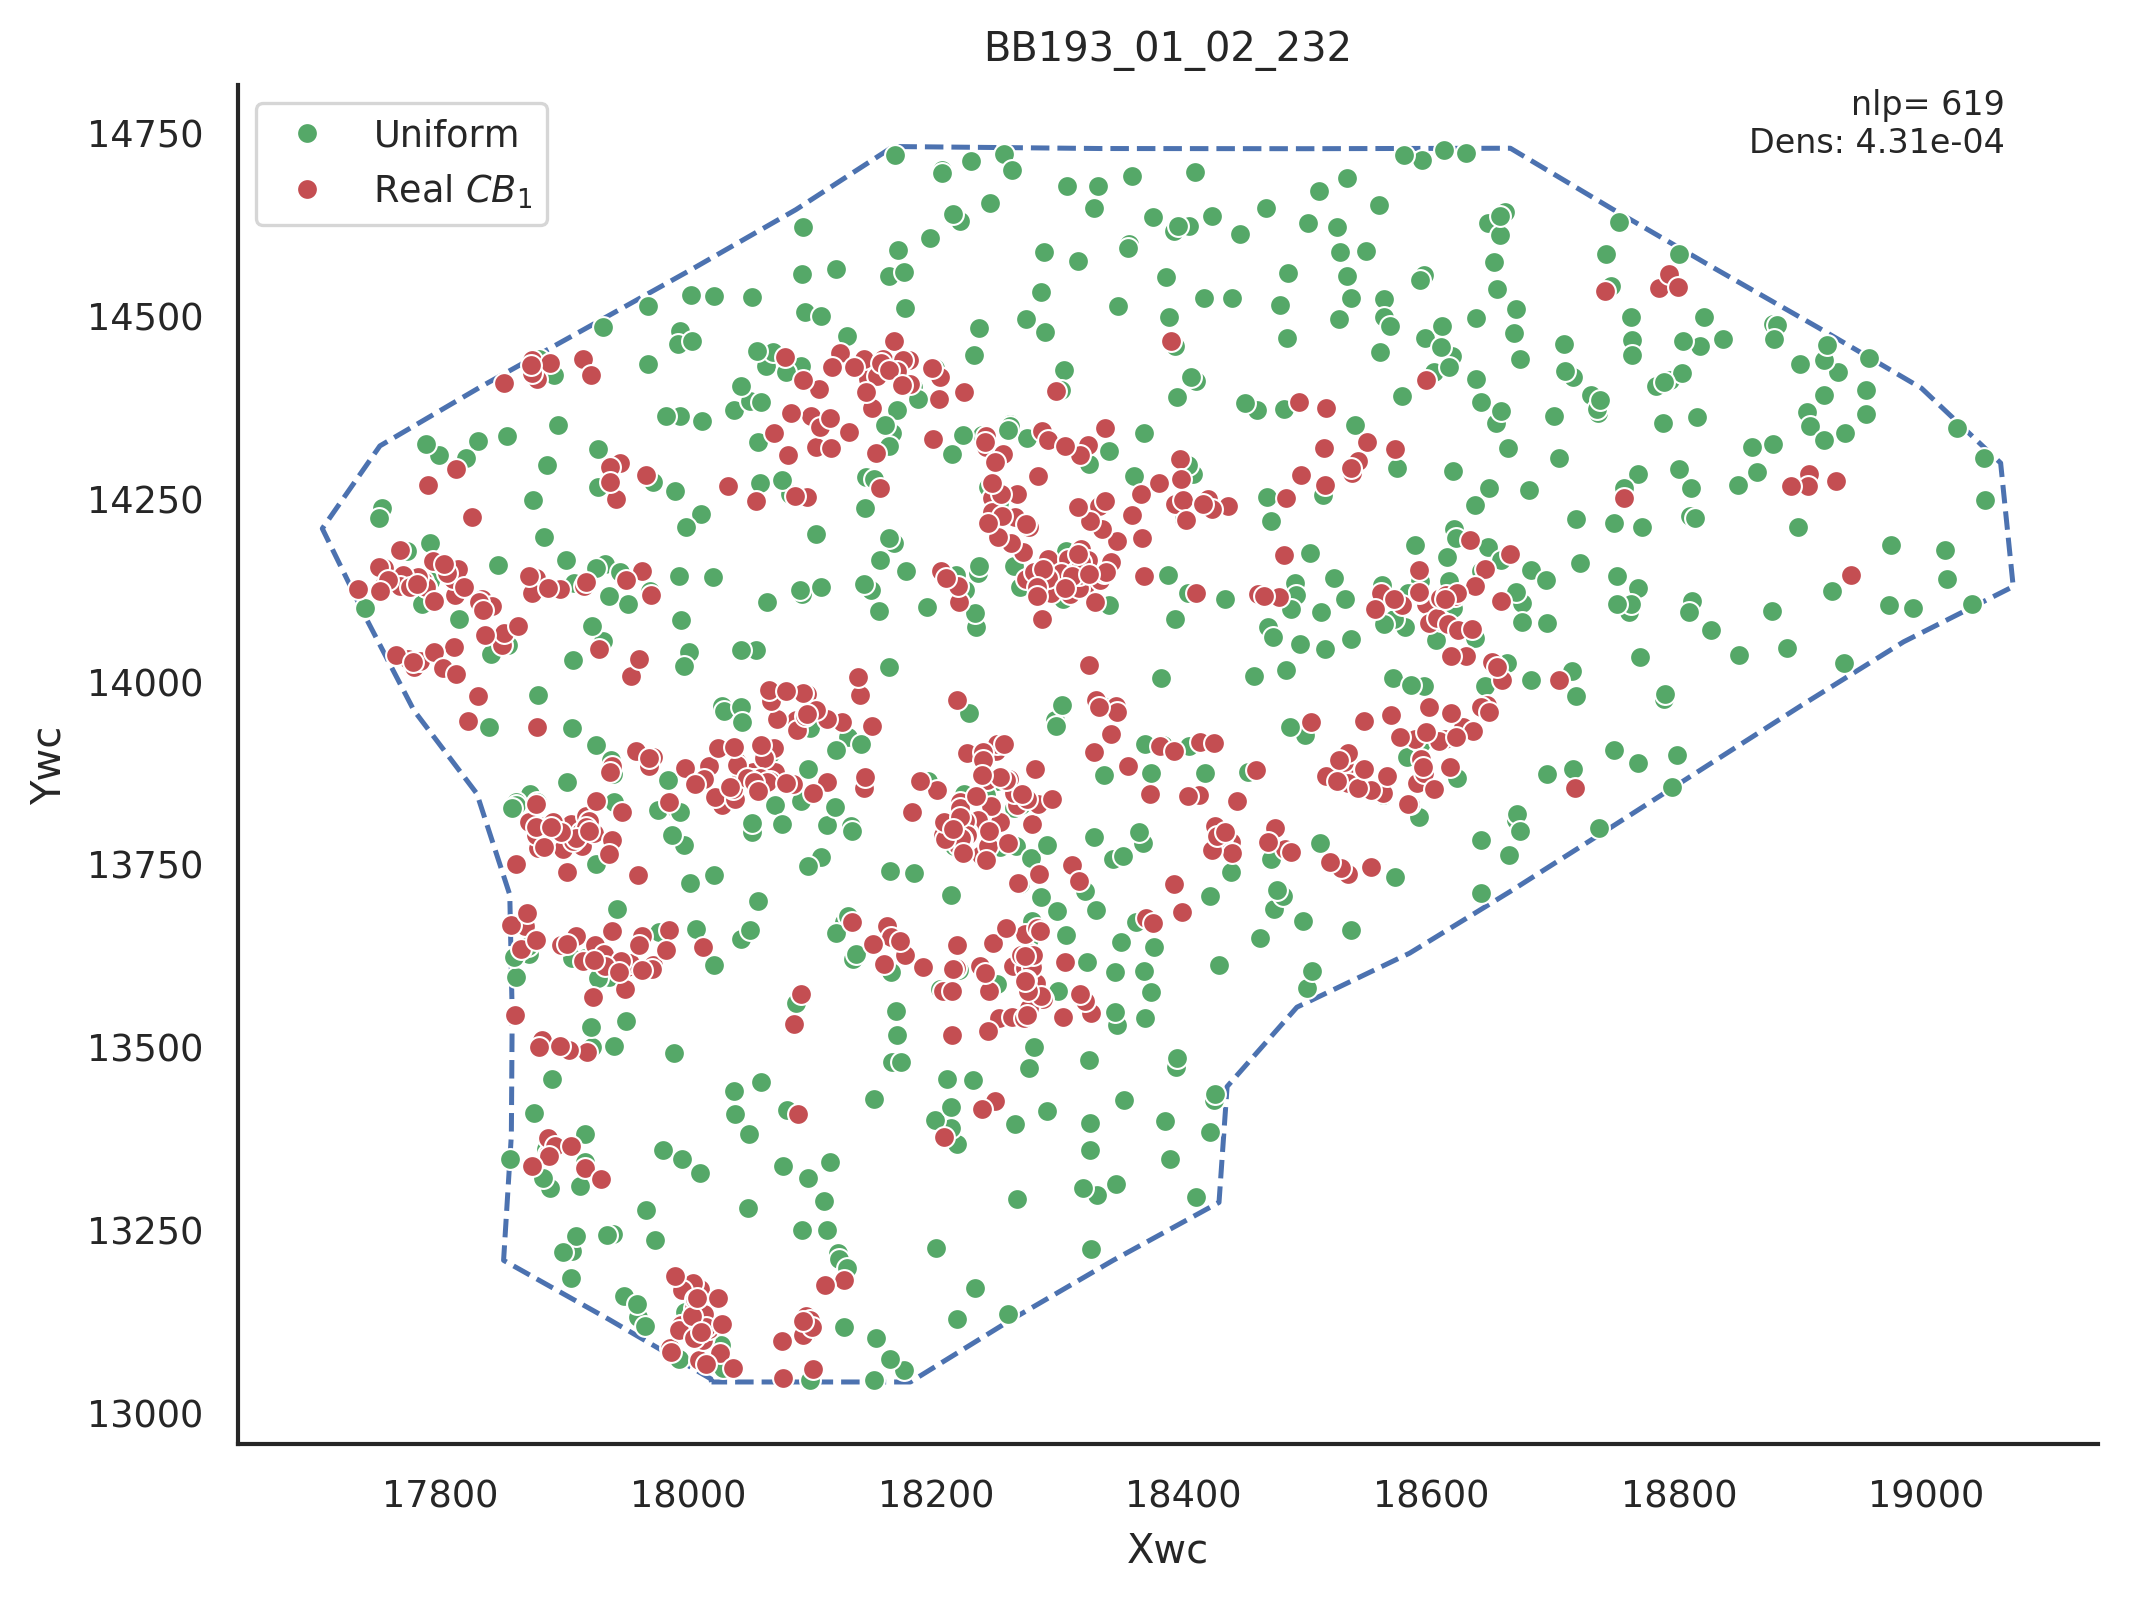

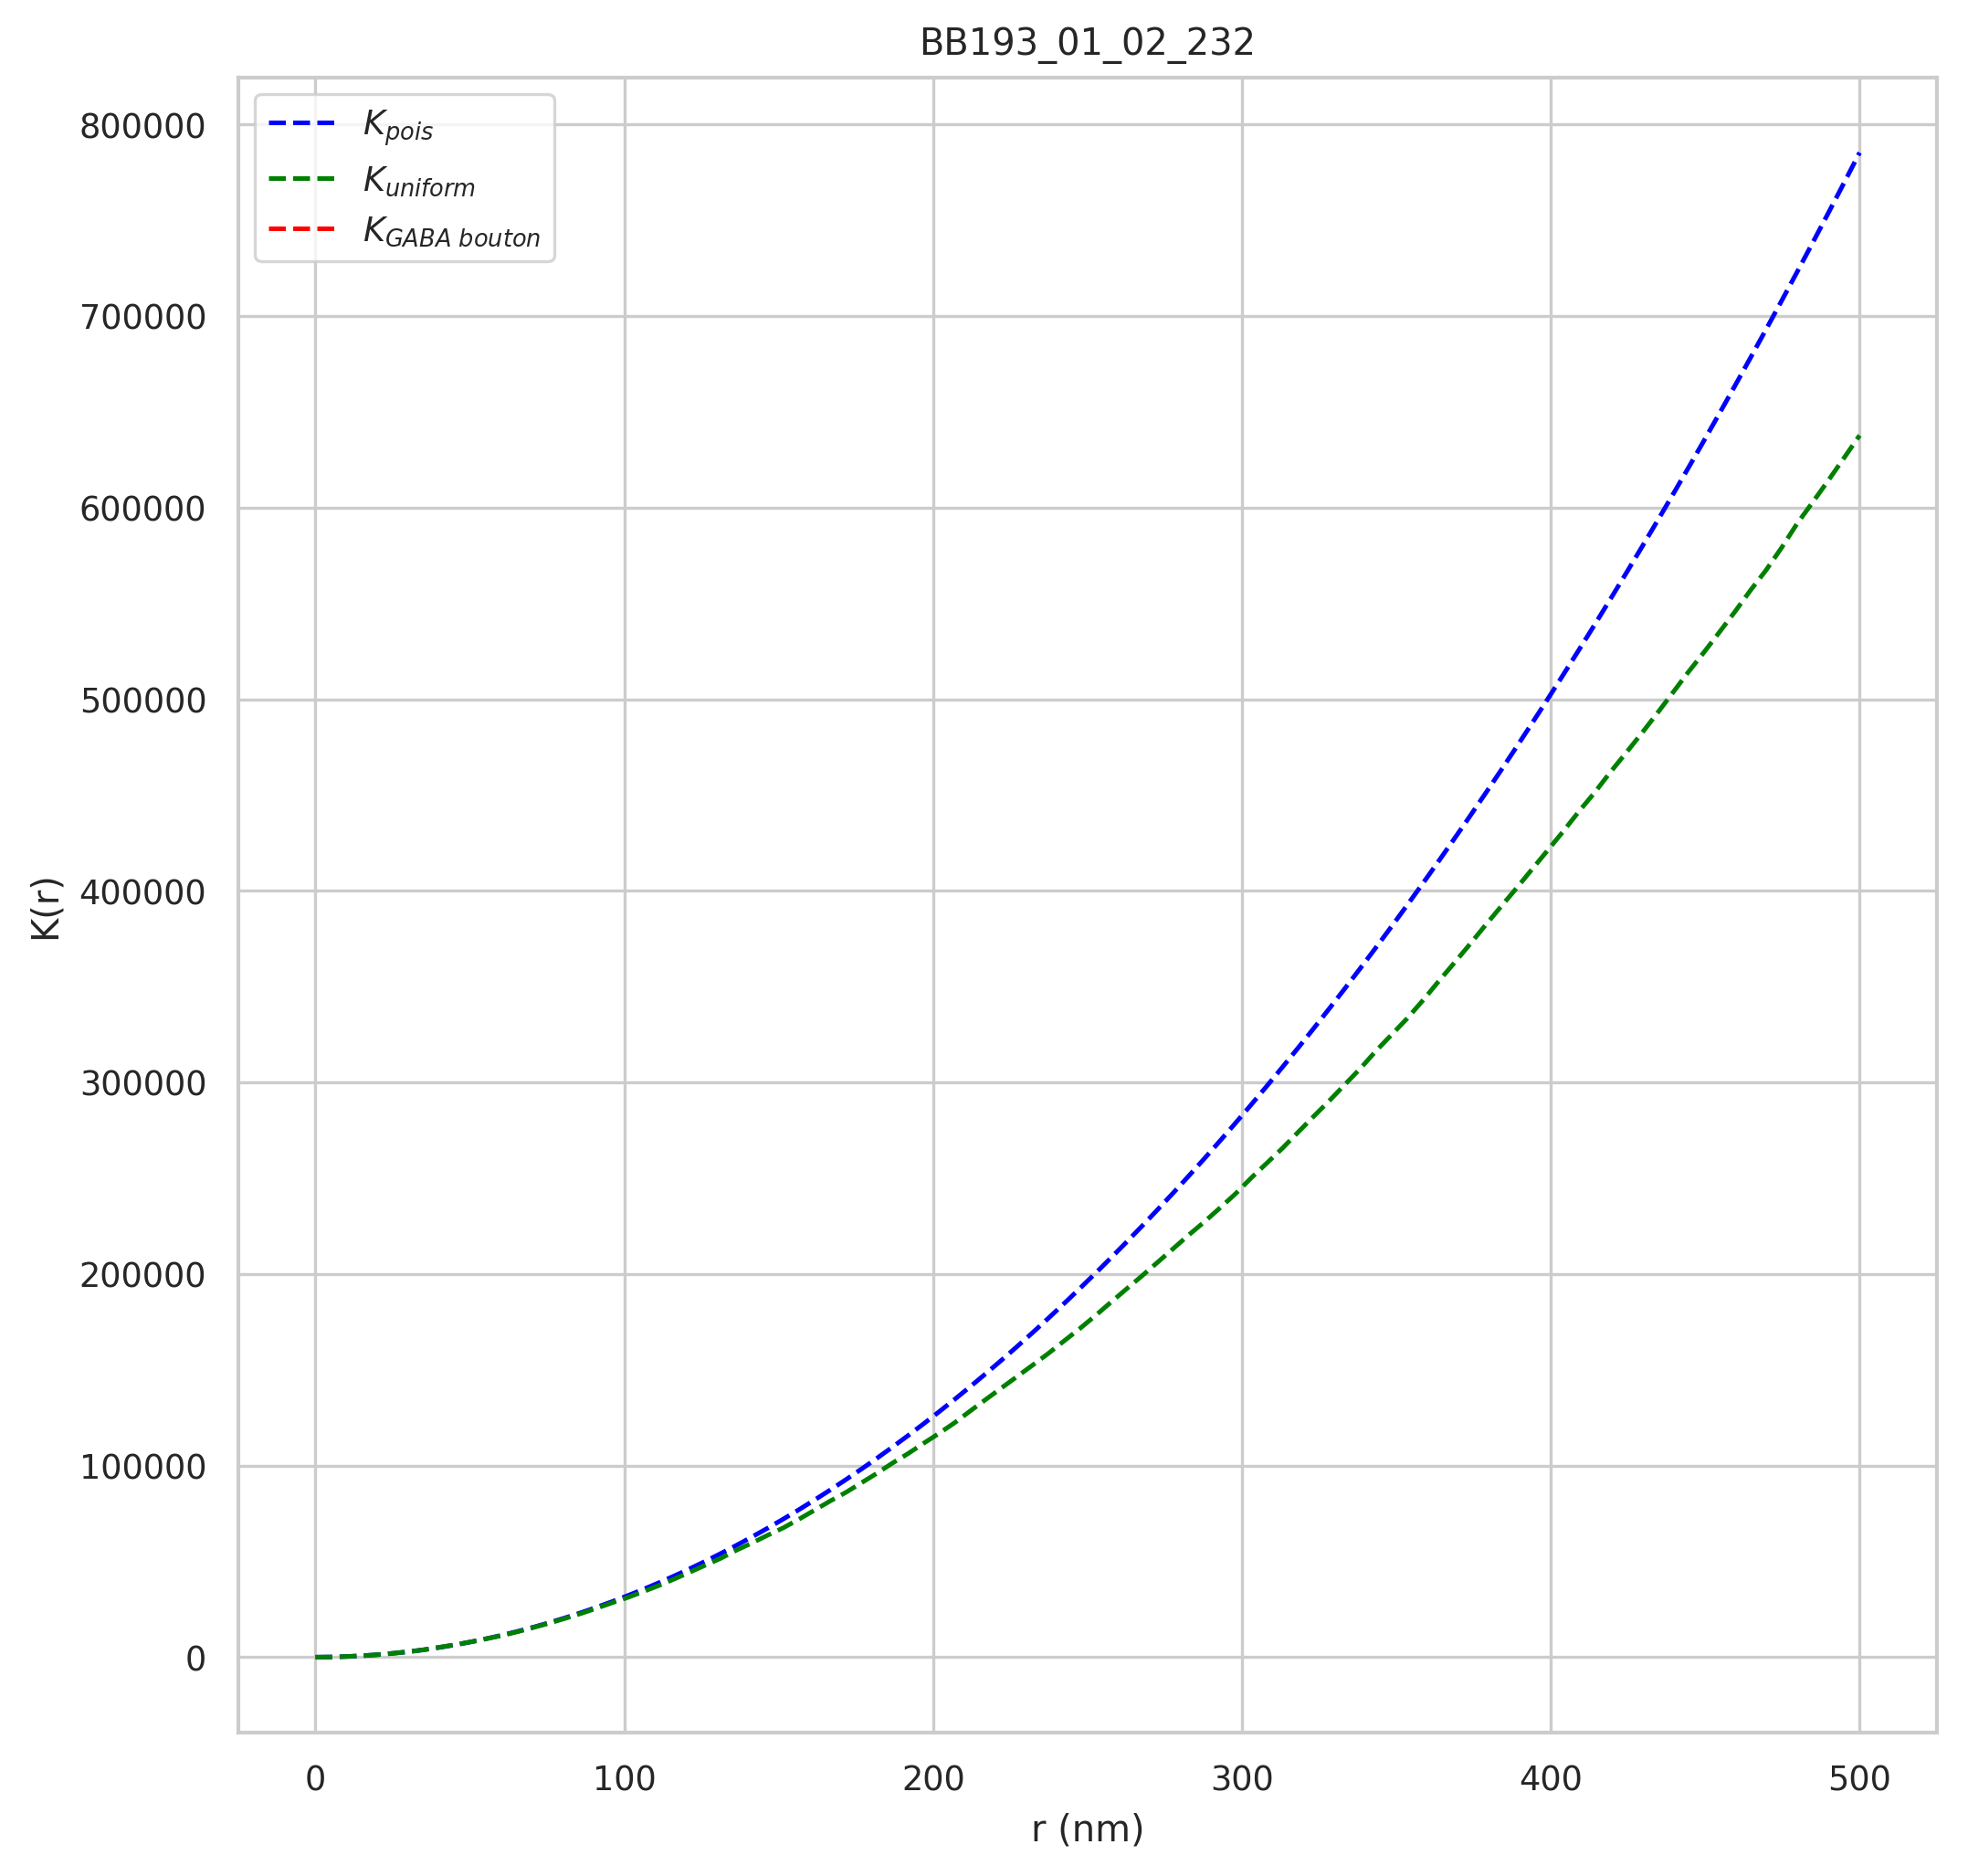

In [110]:
draw_bouton_ripley(path_roiattr='/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/Roiattr_GABA_files/BB193_01_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S34_activeContourROI_232_RoiAttr_COORD.txt', 
                    path_roicoord='/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB193_01_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S34CB_232_RoiCoord.txt')

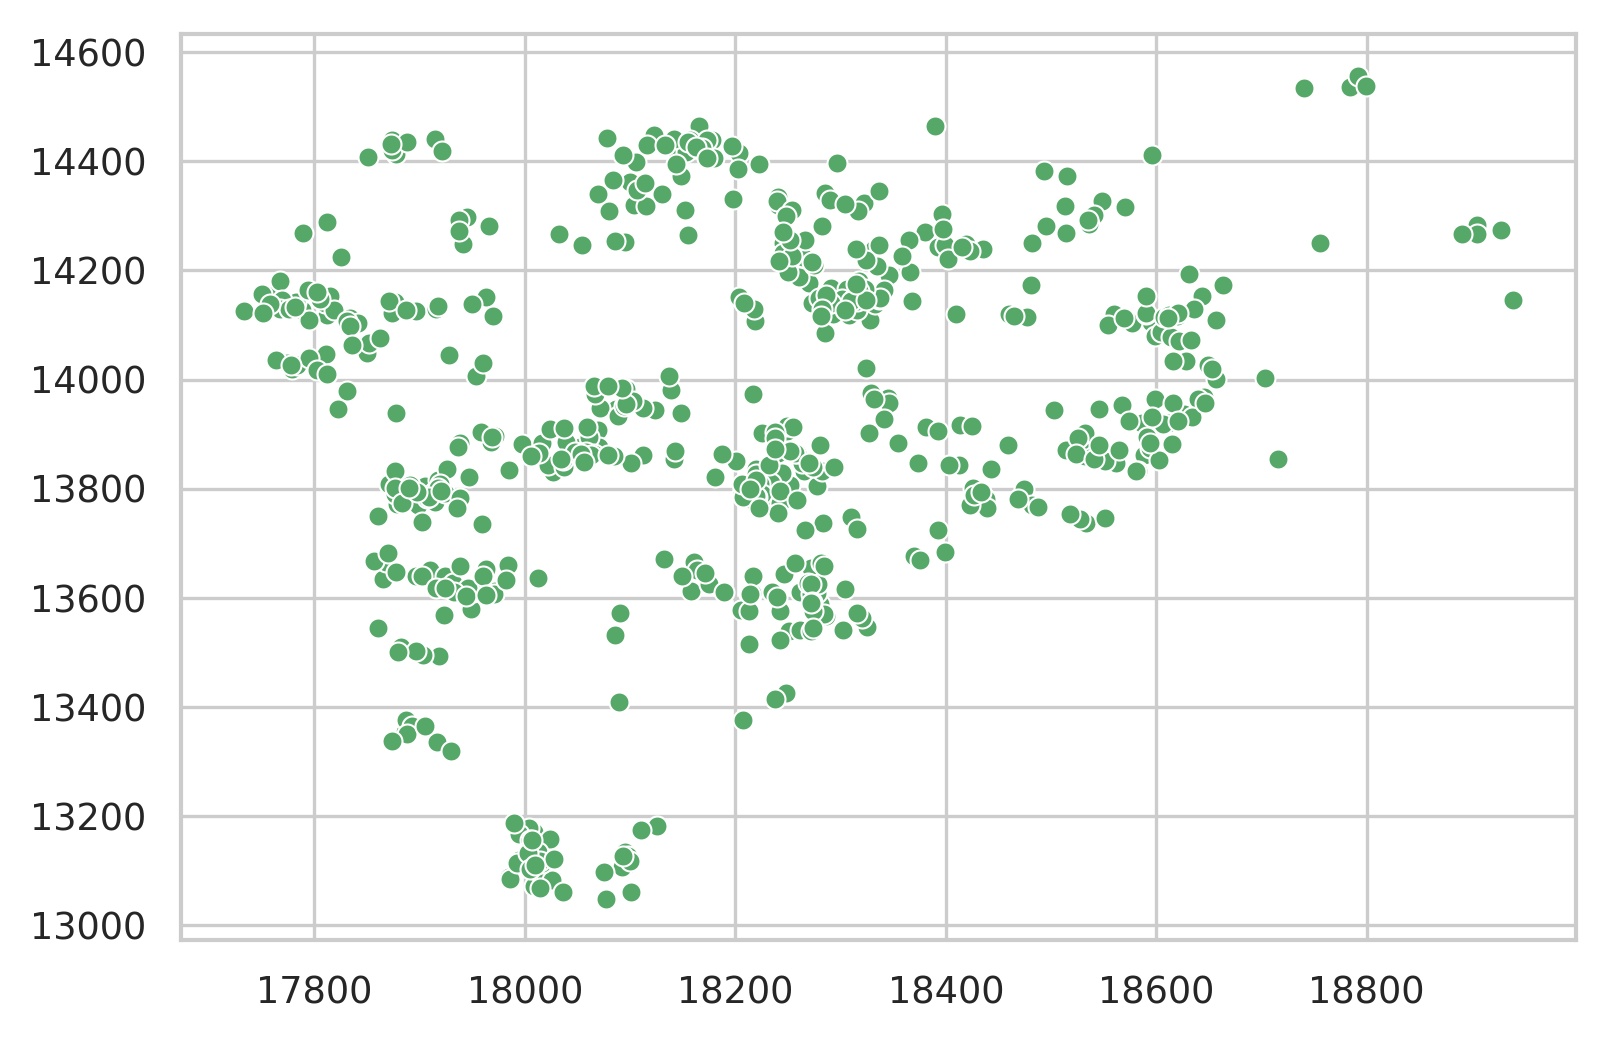

In [100]:
plt.figure(dpi=300)
sns.set(context='paper', style='whitegrid')
coord=pd.read_csv('/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB193_01_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S34CB_232_RoiCoord.txt',
                           sep='\t')
#bb193_01_02_232.info()
xx=coord.loc[coord['Channel Name']=='405/647']['Xwc'] # x coordinates of LP
yy=coord.loc[coord['Channel Name']=='405/647']['Ywc'] # y coordinate of LP
plt.plot(xx,yy, 'go', markeredgecolor='w', markeredgewidth=0.5)

In [366]:
xhi = list(hi['RoiAttr'])
yhi = list(hi['RoiCoord'])
xlo = list(lo['RoiAttr'])
ylo = list(lo['RoiCoord'])
xct = list(ct['RoiAttr'])
yct = list(ct['RoiCoord'])
len(yhi)

75

In [55]:
hizip=zip(xhi, yhi)

In [56]:
high=[]
for xhi, yhi in hizip:
    high.append(count_bouton_ripley(yhi, xhi))

/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm01_list-2018-06-25-19-18-35_S01CB_4_RoiCoord.txt
Number of real points: 924 
Number of generated points: 924
BB185_02_01_4 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02CB_13_RoiCoord.txt
Number of real points: 1474 
Number of generated points: 1474
BB185_02_02_13 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm02_list-2018-06-25-19-18-35_S02CB_16_RoiCoord.txt
Number of real points: 820 
Number of generated points: 820
BB185_02_02_16 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB185_02_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S03CB_19_RoiCoord.txt
Number of real points: 1210 
Number of generated points: 1210
BB185_02_0

/home/balla-gyula/anaconda3/lib/python3.7/site-packages/astropy/stats/spatial.py:315: RuntimeWarning: divide by zero encountered in true_divide
  w1 = (1 - (np.arccos(np.minimum(ver_dist, dist) / dist) +
/home/balla-gyula/anaconda3/lib/python3.7/site-packages/astropy/stats/spatial.py:315: RuntimeWarning: invalid value encountered in true_divide
  w1 = (1 - (np.arccos(np.minimum(ver_dist, dist) / dist) +
/home/balla-gyula/anaconda3/lib/python3.7/site-packages/astropy/stats/spatial.py:315: RuntimeWarning: invalid value encountered in arccos
  w1 = (1 - (np.arccos(np.minimum(ver_dist, dist) / dist) +
/home/balla-gyula/anaconda3/lib/python3.7/site-packages/astropy/stats/spatial.py:316: RuntimeWarning: divide by zero encountered in true_divide
  np.arccos(np.minimum(hor_dist, dist) / dist)) / np.pi)
/home/balla-gyula/anaconda3/lib/python3.7/site-packages/astropy/stats/spatial.py:316: RuntimeWarning: invalid value encountered in true_divide
  np.arccos(np.minimum(hor_dist, dist) / dist)) / n

BB193_01_02_232 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB193_01_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S35CB_235_RoiCoord.txt
Number of real points: 1470 
Number of generated points: 1470
BB193_01_03_235 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB193_01_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S35CB_240_RoiCoord.txt
Number of real points: 598 
Number of generated points: 598
BB193_01_03_240 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB193_01_934_CB1_647_1116_Bsn_568_storm03_list-2018-06-25-19-18-35_S35CB_243_RoiCoord.txt
Number of real points: 2748 
Number of generated points: 2748
BB193_01_03_243 Done
/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/RoiCoord_GABA_files/BB193_01_934_CB1_647_1116_Bsn_568_storm04_list-2018-06-25-19-18-35_S36CB_246_RoiCoord.txt
Number of real points: 1316 
Number of g

In [57]:
high

[{'Name': 'BB185_02_01_4',
  'Poisson': array([0.00000000e+00, 8.01344927e+01, 3.20537971e+02, 7.21210435e+02,
         1.28215188e+03, 2.00336232e+03, 2.88484174e+03, 3.92659014e+03,
         5.12860754e+03, 6.49089391e+03, 8.01344927e+03, 9.69627362e+03,
         1.15393670e+04, 1.35427293e+04, 1.57063606e+04, 1.80302609e+04,
         2.05144301e+04, 2.31588684e+04, 2.59635756e+04, 2.89285519e+04,
         3.20537971e+04, 3.53393113e+04, 3.87850945e+04, 4.23911467e+04,
         4.61574678e+04, 5.00840580e+04, 5.41709171e+04, 5.84180452e+04,
         6.28254423e+04, 6.73931084e+04, 7.21210435e+04, 7.70092475e+04,
         8.20577206e+04, 8.72664626e+04, 9.26354736e+04, 9.81647536e+04,
         1.03854303e+05, 1.09704121e+05, 1.15714208e+05, 1.21884563e+05,
         1.28215188e+05, 1.34706082e+05, 1.41357245e+05, 1.48168677e+05,
         1.55140378e+05, 1.62272348e+05, 1.69564587e+05, 1.77017094e+05,
         1.84629871e+05, 1.92402917e+05, 2.00336232e+05, 2.08429816e+05,
         2.16

In [334]:
df=pd.DataFrame(high)
df.set_index('Name', inplace=True)
df2=df.drop('BB193_01_02_232')
df2.head(2)

Poisson  \
Name                                                                                                                                                                                                                                                                                                                          
BB185_02_01_4   [0.0, 80.13449274537784, 320.53797098151136, 721.2104347084006, 1282.1518839260455, 2003.3623186344462, 2884.8417388336024, 3926.590144523514, 5128.607535704182, 6490.8939123756045, 8013.449274537785, 9696.273622190716, 11539.36695533441, 13542.729273968851, 15706.360578094056, 18030.26086771001...   
BB185_02_02_13  [0.0, 80.13449274537784, 320.53797098151136, 721.2104347084006, 1282.1518839260455, 2003.3623186344462, 2884.8417388336024, 3926.590144523514, 5128.607535704182, 6490.8939123756045, 8013.449274537785, 9696.273622190716, 11539.36695533441, 13542.729273968851, 15706.360578094056, 18030.26086771001...   

                                                                                                                                                                                                                                                                                                                       Real  \
Name                                                                                                                                                                                                                                                                                                                          
BB185_02_01_4   [0.0, 473.7349299906895, 1891.6949601683011, 4065.684022454342, 6966.4992786987, 10279.39902883907, 13816.187204796957, 17498.9895715054, 21194.77097739167, 24712.090594582816, 28368.934882935602, 31951.149696015884, 35530.11974930171, 38946.8518128647, 42330.123092743546, 45685.20472021185, 490...   
BB185_02_02_13  [0.0, 305.71442527564335, 1182.2135867595687, 2475.7567041108455, 4137.74755365849, 6151.398349043436, 8483.133517547547, 10973.027304908133, 13618.429008015868, 16469.70198594795, 19279.447281833924, 22240.282654951498, 25307.146152442125, 28452.904756172902, 31668.718861987385, 34891.865259033...   

                                                                                                                                                                                                                                                                                                                    Uniform  
Name                                                                                                                                                                                                                                                                                                                         
BB185_02_01_4   [0.0, 74.62947527250587, 311.4969402678506, 743.049992930602, 1253.179273269798, 2007.926709309062, 2854.8090156622807, 3862.608102802079, 5050.499597732216, 6435.999520673608, 7964.561425078939, 9379.773824389718, 11068.71553665339, 13011.281314614214, 15085.502758469136, 17227.272681310715, 19...  
BB185_02_02_13  [0.0, 80.40466098290041, 319.8959549567369, 748.088462460864, 1308.5912900468109, 2003.4657489822123, 2844.2660051812545, 3872.3960353296807, 4971.396186990292, 6266.221978090146, 7646.351939162234, 9117.50023096203, 10809.833576319585, 12707.943292862217, 14728.563986417415, 16858.512907856806,...

In [335]:
r=np.linspace(0,500,100)
poi=df2['Poisson']
df2_poi=df2['Poisson'].apply(pd.Series)
df2_rl=df2['Real'].apply(pd.Series)
df2_uni=df2['Uniform'].apply(pd.Series)
df2_uni.head(3)

0          1           2           3            4   \
Name                                                                  
BB185_02_01_4   0.0  74.629475  311.496940  743.049993  1253.179273   
BB185_02_02_13  0.0  80.404661  319.895955  748.088462  1308.591290   
BB185_02_02_16  0.0  60.405897  345.176552  797.604782  1286.604897   

                         5            6            7            8   \
Name                                                                 
BB185_02_01_4   2007.926709  2854.809016  3862.608103  5050.499598   
BB185_02_02_13  2003.465749  2844.266005  3872.396035  4971.396187   
BB185_02_02_16  1958.280210  2800.110865  3729.274951  4878.853618   

                         9       ...                   90             91  \
Name                             ...                                       
BB185_02_01_4   6435.999521      ...        519277.009176  530042.282593   
BB185_02_02_13  6266.221978      ...        518350.493733  529131.718361   
BB185_02_02_16  6223.864532      ...        471256.941420  480404.210024   

                           92             93             94             95  \
Name                                                                         
BB185_02_01_4   541277.588485  552305.280053  563904.130164  574560.638381   
BB185_02_02_13  540117.986690  551264.288305  562398.187390  573729.609584   
BB185_02_02_16  489685.240912  498969.535487  508518.109302  517798.336458   

                           96             97             98             99  
Name                                                                        
BB185_02_01_4   585564.546297  597104.423923  608278.763804  619781.480816  
BB185_02_02_13  585327.664732  596803.634425  608316.428117  619990.351429  
BB185_02_02_16  527423.641079  536725.966713  546302.530527  555983.586061  

[3 rows x 100 columns]

In [339]:
df2_poiT=df2_poi.transpose()
df2_uniT=df2_uni.transpose()

df2_rlT['mean']=df2_rlT.mean(axis=1)
df2_rlT['std']=df2_rlT.std(axis=1)
df2_poiT['mean']=df2_poiT.mean(axis=1)
df2_poiT['std']=df2_poiT.std(axis=1)
df2_uniT['mean']=df2_uniT.mean(axis=1)
df2_uniT['std']=df2_uniT.std(axis=1)
# df2_rlT.head()
df2_uniT.tail()

Name  BB185_02_01_4  BB185_02_02_13  BB185_02_02_16  BB185_02_03_19  \
95    574560.638381   573729.609584   517798.336458   572018.443768   
96    585564.546297   585327.664732   527423.641079   582953.486390   
97    597104.423923   596803.634425   536725.966713   593914.803026   
98    608278.763804   608316.428117   546302.530527   605150.293325   
99    619781.480816   619990.351429   555983.586061   616135.145867   

Name  BB185_02_03_24  BB185_03_01_27  BB185_03_02_34  BB185_03_02_37  \
95     568788.299330   590549.957368   575451.912769   596007.338401   
96     579676.366334   601879.640492   586523.174009   607803.665151   
97     591056.642868   613397.406149   598189.337415   619992.743657   
98     602277.450021   625221.135479   609241.814558   632277.900174   
99     613825.510243   636793.016195   620940.223224   644245.707748   

Name  BB185_03_03_40  BB185_03_04_43      ...       BB193_06_02_321  \
95     628543.228256   573982.396089      ...         621557.335245   
96     641303.520887   584919.623677      ...         634625.777744   
97     654315.859452   596240.797423      ...         646970.295206   
98     667140.208725   607624.434601      ...         660232.515318   
99     680168.149742   619515.171359      ...         673653.375387   

Name  BB193_06_02_324  BB193_08_01_327  BB193_08_01_330  BB193_08_01_335  \
95      623659.830840    576746.438556    616687.162306    561925.832893   
96      636082.220418    587850.248663    628979.623541    573043.098626   
97      648750.790061    599077.153066    641360.536678    584762.158683   
98      661337.173322    610276.175222    654166.794042    596012.066932   
99      674188.639657    621905.044629    667029.117581    607337.469218   

Name  BB193_08_02_338  BB193_08_02_341  BB193_08_02_347           mean  \
95      612780.707456    573969.502337    576613.978001  589737.565109   
96      625219.158767    585489.183672    587932.746570  601396.252494   
97      637597.168596    597574.601270    599205.827585  613180.867949   
98      650777.385518    609527.740216    610463.406891  625111.632946   
99      663583.644364    621134.888102    621911.417573  637094.499202   

Name           std  
95    24300.371589  
96    25005.248688  
97    25709.761661  
98    26435.868386  
99    27219.178298  

[5 rows x 76 columns]

Text(0.5, 0, 'r (nm)')

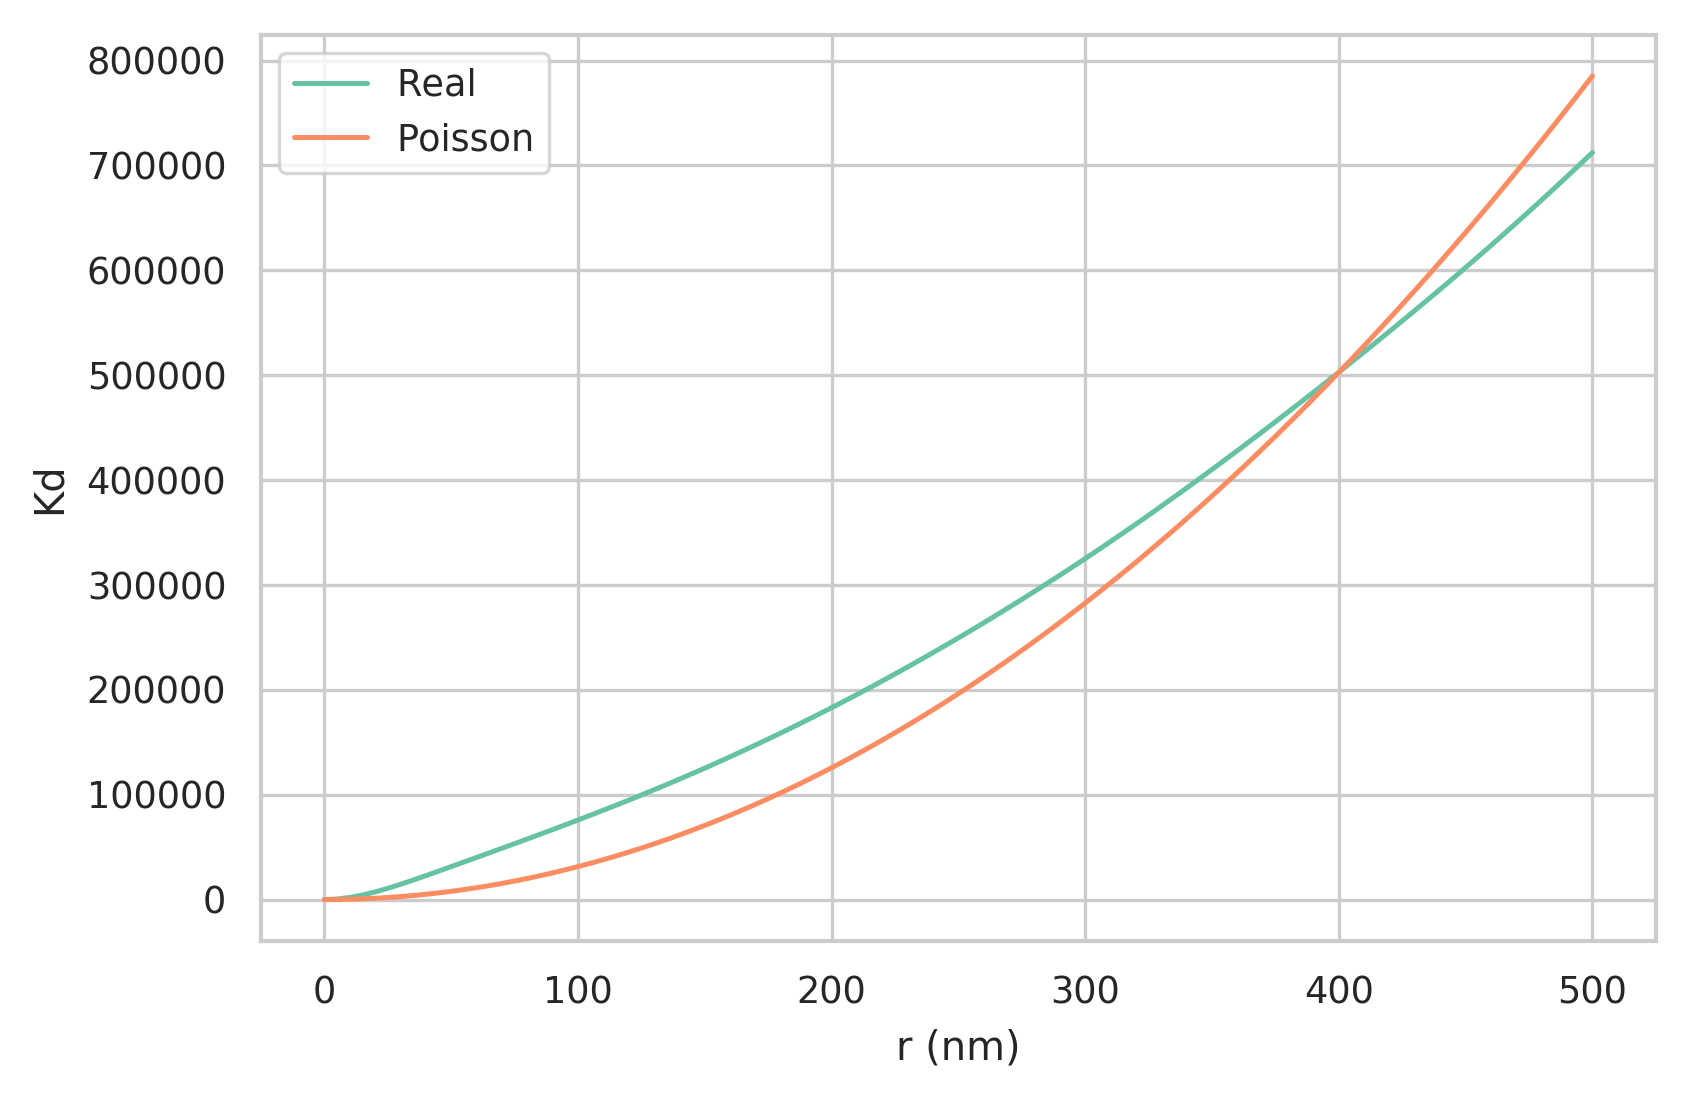

In [315]:
plt.figure(dpi=300)
sns.set(context='paper', style='whitegrid', palette="Set2")
# f=plt.subplots()
f=sns.lineplot(x=r, y=df2_rlT['mean'], label='Real')
f.map()
sns.lineplot(x=r, y=df2_poiT['mean'], label='Poisson')
plt.legend()
plt.ylabel('Kd')
plt.xlabel(r'r (nm)')

Text(0.5, 0, 'r (nm)')

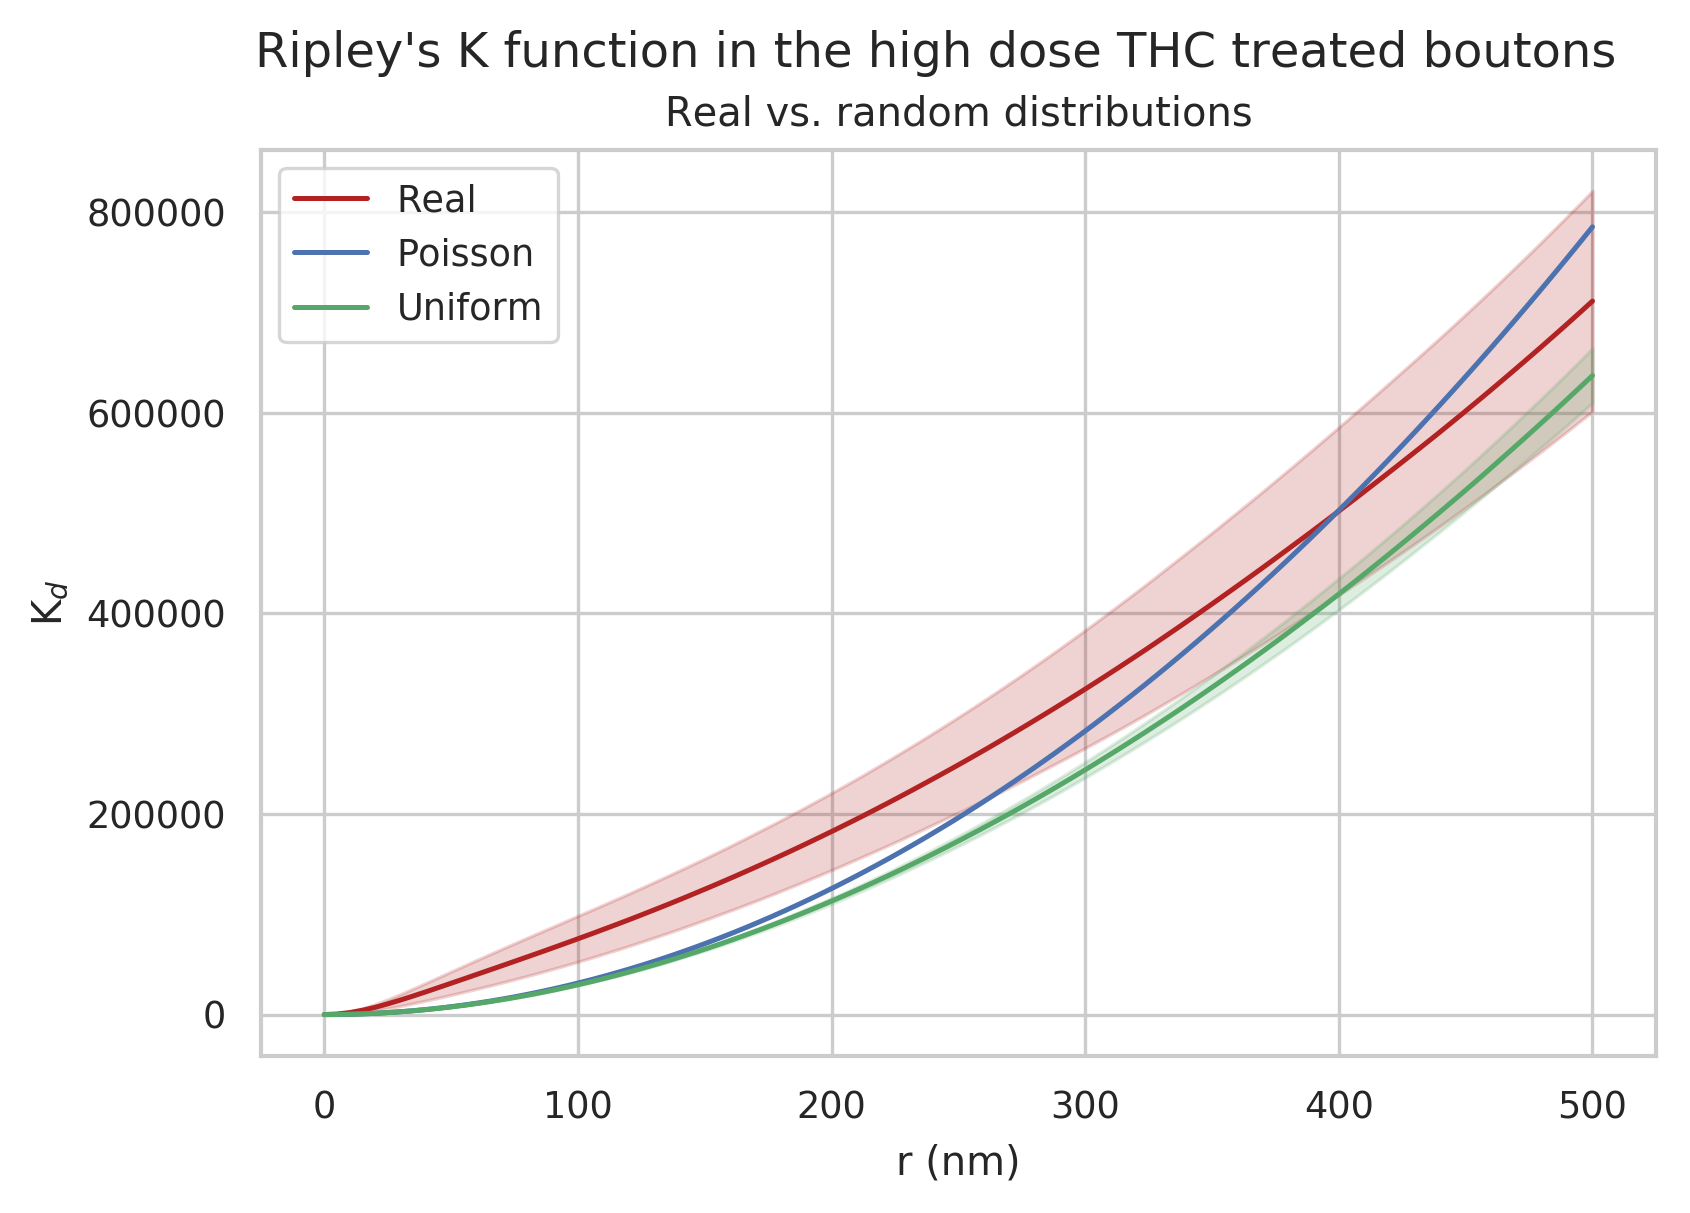

In [377]:
plt.figure(dpi=300)
sns.set(context='paper', style='whitegrid', palette="Set2")
# f=plt.subplots()
plt.plot(r, df2_rlT['mean'], label='Real', color='firebrick')
plt.plot(r, df2_poiT['mean'], label='Poisson', color='b')
plt.plot(r, df2_uniT['mean'], label='Uniform', color='g')
# plt.errorbar(r, df2_rlT['mean'], yerr=df2_rlT['std'], label='Real', rasterized=True)
# plt.errorbar(r, df2_poiT['mean'], yerr=df2_poiT['std'], label='Poisson')
# plt.errorbar(r, df2_uniT['mean'], yerr=df2_uniT['std'], label='Uniform')
# sns.lineplot(x=r, y=df2_poiT['mean'], label='Poisson')

rtm, rtp = df2_rlT['mean'] - df2_rlT['std'], df2_rlT['mean'] + df2_rlT['std']
# rtp=df2_rlT['mean'] + df2_rlT['std']
poim=df2_poiT['mean']-df2_poiT['std']
poip=df2_poiT['mean']+df2_poiT['std']
unim=df2_uniT['mean']-df2_uniT['std']
unip=df2_uniT['mean']+df2_uniT['std']

plt.fill_between(r, rtm, rtp, alpha=0.2, color='firebrick')
plt.fill_between(r, poim, poip, alpha=0.2, color='b')
plt.fill_between(r, unim, unip, alpha=0.2, color='g')

plt.suptitle(r"Ripley's K function in the high dose THC treated boutons")
plt.title('Real vs. random distributions')
plt.legend(loc=2)
plt.ylabel(r'K$_d$')
plt.xlabel(r'r (nm)')

In [257]:
poi_unstack=df2_poi.transpose().unstack().reset_index()
poi_long=poi_unstack.rename(index=str, columns={'level_1':'Level', 0:'Poisson'})
poi_long.head()

Name  Level      Poisson
0  BB185_02_01_4      0     0.000000
1  BB185_02_01_4      1    80.134493
2  BB185_02_01_4      2   320.537971
3  BB185_02_01_4      3   721.210435
4  BB185_02_01_4      4  1282.151884

In [269]:
rl_unstack=df2_rl.transpose().unstack().reset_index()
rl_long=rl_unstack.rename(index=str, columns={'level_1':'Level', 0:'Real'})
rl_long.head()

Name  Level         Real
0  BB185_02_01_4      0     0.000000
1  BB185_02_01_4      1   473.734930
2  BB185_02_01_4      2  1891.694960
3  BB185_02_01_4      3  4065.684022
4  BB185_02_01_4      4  6966.499279

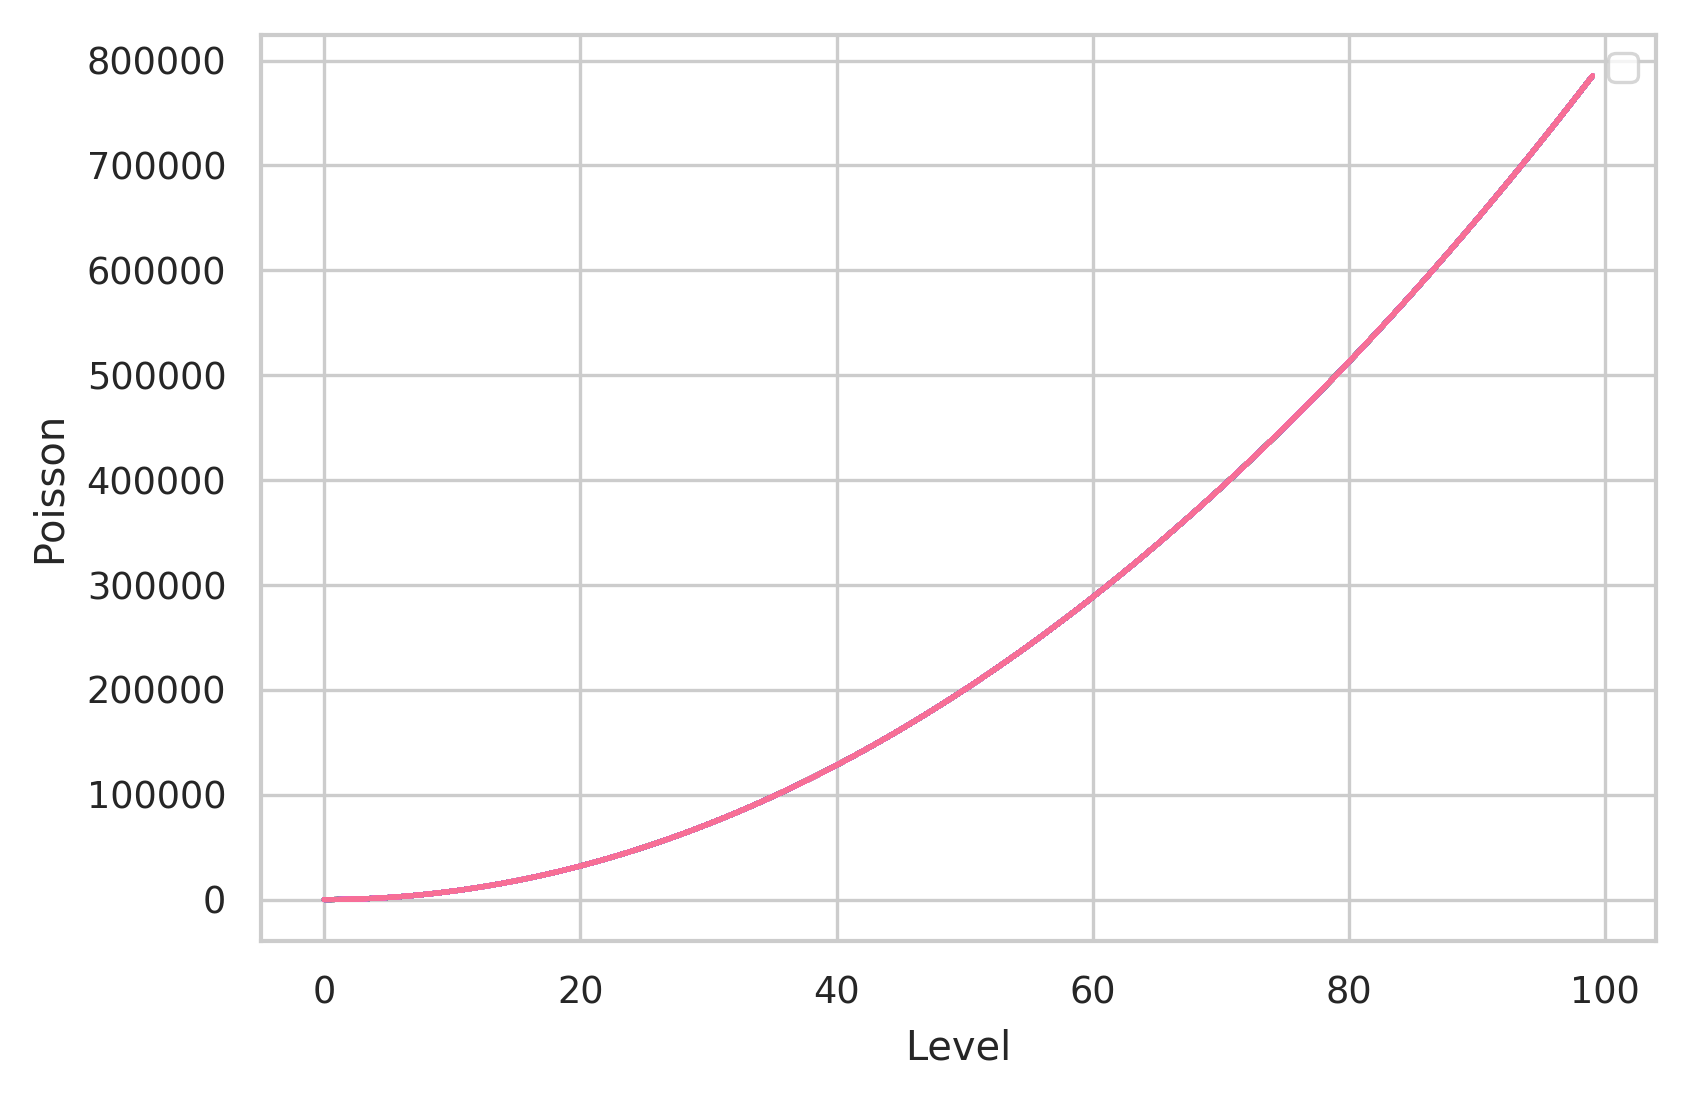

In [261]:
plt.figure(dpi=300)
sns.set(context='paper', style='whitegrid')
sns.lineplot(x=poi_long['Level'], y=poi_long['Poisson'], hue=poi_long['Name'], label=None, ci='sd', err_style='band', estimator=np.median)
plt.legend('')

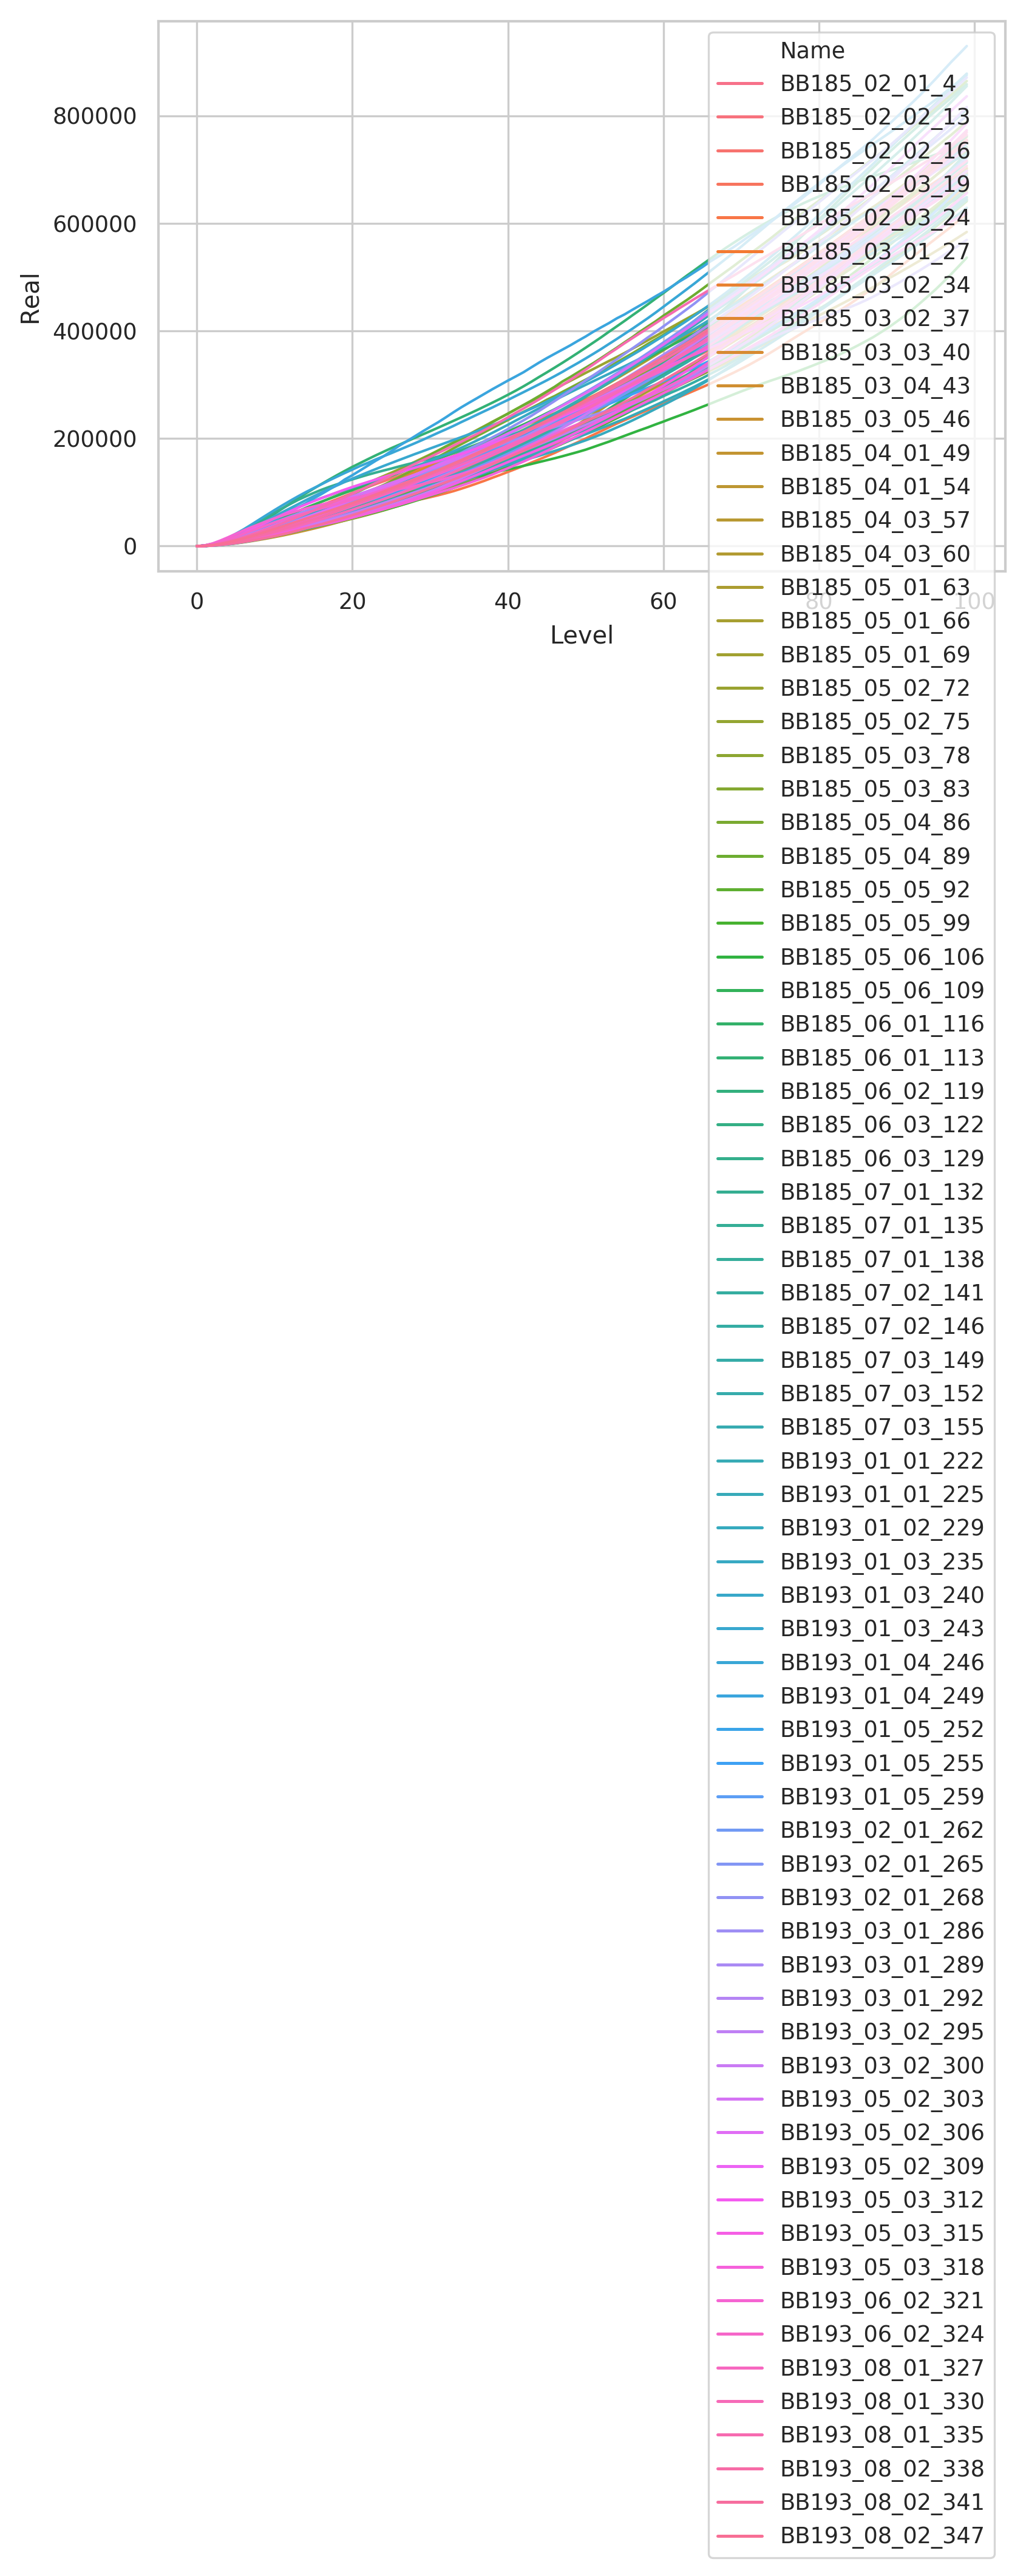

In [273]:
plt.figure(dpi=300)
sns.set(context='paper', style='whitegrid')
sns.lineplot(x=rl_long['Level'], y=rl_long['Real'], hue=rl_long['Name'], label=None, ci='sd', err_style='band', estimator="median", lw=1)
# plt.legend('')

IndexError: single positional indexer is out-of-bounds

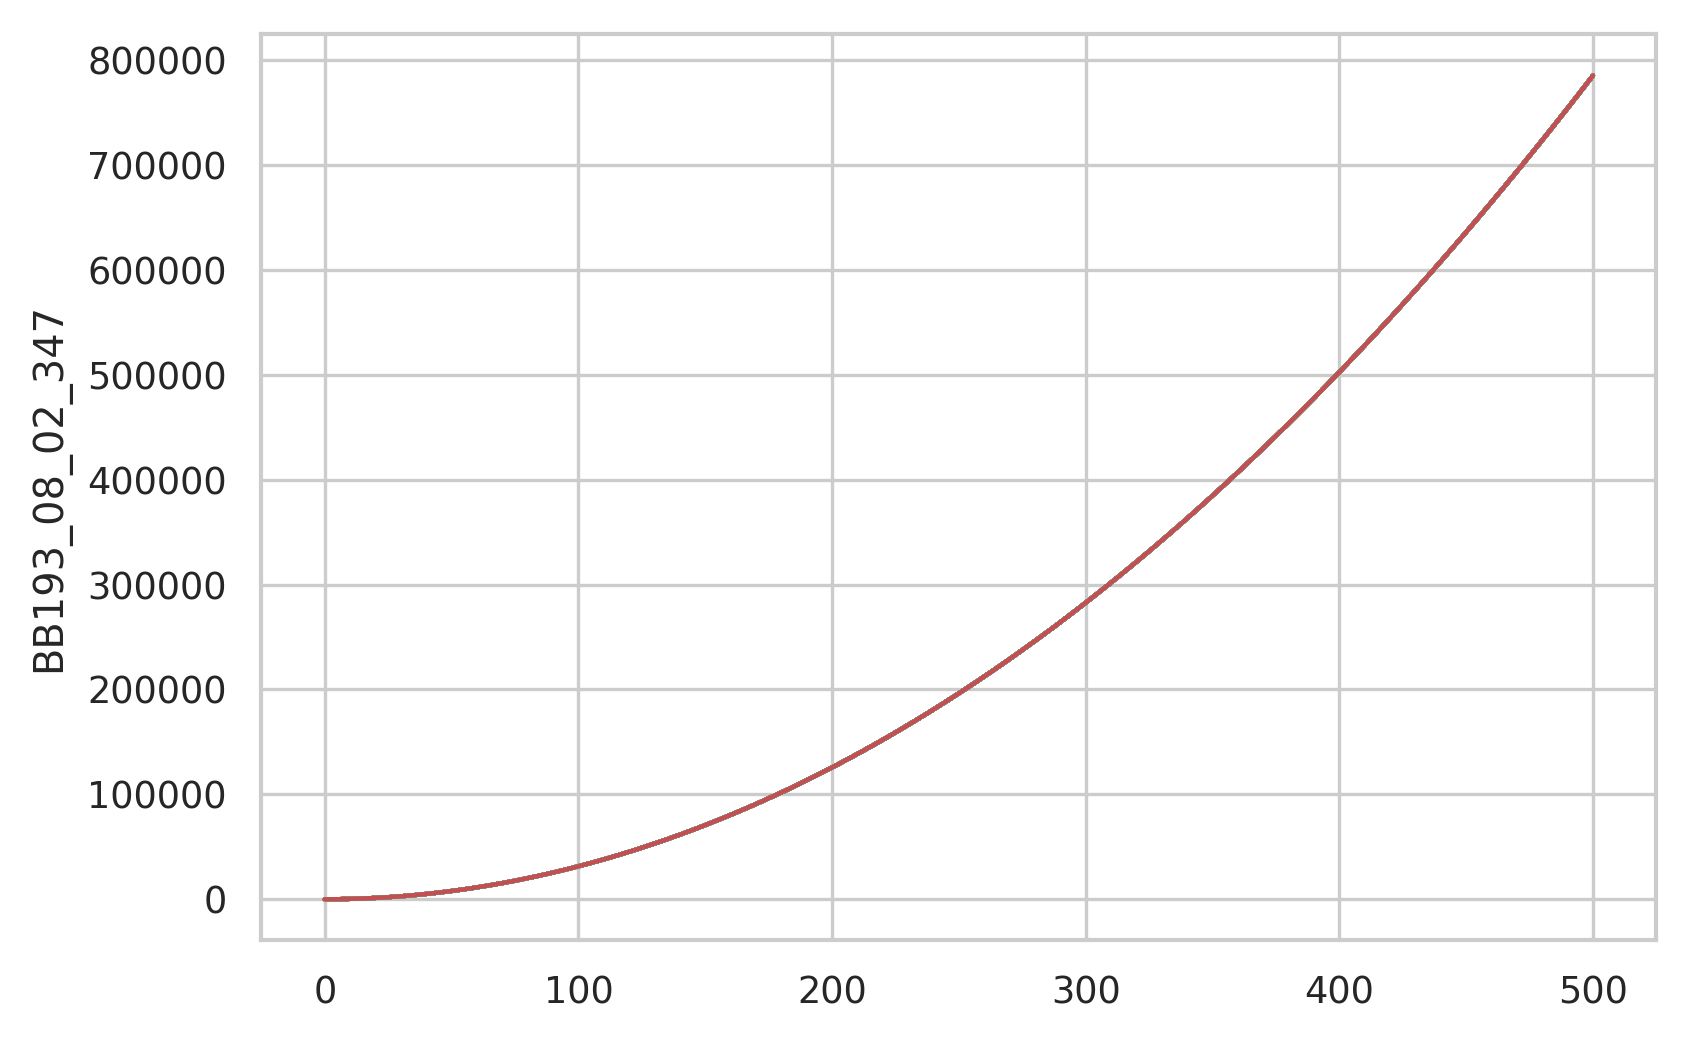

In [180]:
plt.figure(dpi=300)
sns.set(context='paper', style='whitegrid')
for l in df2_poi:
    sns.lineplot(r, df2_poi.iloc[l], ci=95, estimator='mean', lw=1)

In [37]:
hidct=defaultdict(list)
for k, v in chain(high):
    hidct[k].append[v]

ValueError: too many values to unpack (expected 2)

[]

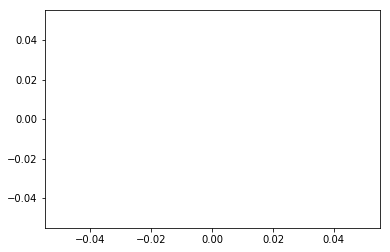

In [10]:
#     sns.set(style="white", context="paper")
#     f=plt.figure(figsize=(8,6), dpi=300)
#     ax=f.add_subplot(111)
#     plt.plot(attr01['x'], attr01['y'], 'b--', label='_nolegend_')
#     plt.plot(fx,fy, 'go', markersize=5, markeredgecolor="w", markeredgewidth=0.5, label='Uniform')
#     plt.plot(xx,yy, 'ro', markersize=5, markeredgecolor="w", markeredgewidth=0.5, label='Real $CB_1$')
#     plt.legend(loc=2)
#     fpath, fname = os.path.split(path_roicoord)
#     code =  re.search(r'(BB\d{3}_\d{2}_).*storm(\d{2}_).*_(\d+)_RoiCoord.txt', fname)
#     idf = str(code.group(1) + code.group(2) + code.group(3) + '_bouton.png')
#     base = '/mnt/csoport43-2/Gyula/STORM_alignment_investigation_data/data/plots_GABA/'
#     filename_bouton = os.path.join(base, idf)
#     plt.title(str(code.group(1) + code.group(2) + code.group(3)))
#     plt.xlabel(('Xwc'))
#     plt.ylabel('Ywc')
#     dens = n/pr
#     plt.text(0.95,0.95, f'nlp= {n}\nDens: {dens:.<3.2e}', transform=ax.transAxes, fontsize=8, ha='right')
#     sns.despine()
#     f.savefig(filename_bouton, bbox_inches='tight')
#     plt.close()